In [1]:
# Require: tensorflow-1.13
!pip install tensorflow=='1.13.1'
# Require: pandas-0.25+
!pip install pandas --upgrade
# if upgraded, please restart the kernel to let it take effect

Requirement already up-to-date: pandas in /usr/local/envs/py3env/lib/python3.5/site-packages (0.25.3)


In [2]:
import sys
sys.path.append('data_generation')
sys.path.append('util')
sys.path.append('neural_networks')
sys.path.append('experiments')

In [3]:
import tensorflow as tf
from dataset_manager import DataSetManager
from dataset import DataSetKey
from my_enums import Pricers,Generators
from ds_spec import DsSpecs
from experiment_manager import ExperimentManager
from my_config import Config
import os
from multiprocessing import Process
import time
import pandas as pd
import pickle
from metrics import Metrics
import matplotlib.pyplot as plt
import itertools

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Load Dataset Manager and Experiment Manager (Connections to raw data, and trained networks)

In [4]:
dsm = DataSetManager.get_default_in_mem_DSM()

Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_0
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_1
Loading DataSetKey(Generators.Uniform, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_2
Loading DataSetKey(Generators.Halton, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_3
Loading DataSetKey(Generators.Halton, Pricers.Whaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_4
Loading DataSetKey(Generators.Halton, Pricers.JuZhongWhaley, Pricers.BSFormula, DsSpecs.SPEC_1_1_1) at /content/datalab/Data/datasets/ds_5
Loading DataSetKey(Generators.Uniform, Pricers.JuZhong, Pricers.BSFormula, DsSpecs.SPEC_2_1_1) at /content/datalab/Data/datasets/ds_6
Loading DataSetKey(Generators.Uniform, Pricers.Whaley, 

In [5]:
em = ExperimentManager.create_or_load(os.path.join(Config.experiments_dir,'set3'),dsm)

In [6]:
em_df = em.get_info_df()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_73/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_8/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_65/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_79/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_48/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_85/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_14/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_61/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_53/model/model-50
INFO:tensorflow:Restoring parame

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_87/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_25/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_49/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_24/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_62/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_20/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_4/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_60/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_74/model/model-50


In [7]:
em_df

,American Pricer,European Pricer,Generator,Specs,Activation Funcs,drop rates,epochs run,nodes,train_size,exp_dir
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[leaky_relu, sigmoid]","[0.0, 0.0]",50,"[20, 20]",25000,/content/datalab/Experiments/set3/exp_73
1,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,[sigmoid],[0.0],50,[10],25000,/content/datalab/Experiments/set3/exp_8
2,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[relu, relu]","[0.0, 0.0]",50,"[20, 20]",25000,/content/datalab/Experiments/set3/exp_65
3,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[elu, tanh]","[0.0, 0.0]",50,"[20, 20]",25000,/content/datalab/Experiments/set3/exp_79
4,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[leaky_relu, sigmoid]","[0.0, 0.0]",50,"[10, 10]",25000,/content/datalab/Experiments/set3/exp_48
...,...,...,...,...,...,...,...,...,...,...
85,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[tanh, elu]","[0.0, 0.0]",50,"[10, 10]",25000,/content/datalab/Experiments/set3/exp_62
86,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[leaky_relu, relu]","[0.0, 0.0]",50,"[5, 5]",25000,/content/datalab/Experiments/set3/exp_20
87,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,[tanh],[0.0],50,[5],25000,/content/datalab/Experiments/set3/exp_4
88,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,"[tanh, relu]","[0.0, 0.0]",50,"[10, 10]",25000,/content/datalab/Experiments/set3/exp_60


Compute $r^2$ for every possible architecture (all layers with all activations)

In [8]:
def get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man):
    exps = [exp_man.get_exp(dskey,(arch,learn_rate),train_size) for arch in archs]
    r2s = [exp.get_metric(Metrics.r2,exp.get_outsample_data(1000),epoch) for exp in exps]
    return pd.DataFrame({'nodes':[tuple(n for n,af,dr in arch) for arch in archs],
                         'afs':[tuple(af.__name__ for n,af,dr in arch) for arch in archs],
                         'arch':archs,
                         'r2':r2s})

In [9]:
def get_layer_set_r2s(layer_nodes,afs,dskey,learn_rate,train_size,epoch,exp_man):
    af_sets = [tuple(j) for j in set(list(itertools.product(afs,repeat = len(layer_nodes))))]
    archs = [tuple(zip(layer_nodes,afs,tuple(0.0 for n in layer_nodes))) for afs in af_sets]
    return get_arch_r2s(archs,dskey,learn_rate,train_size,epoch,exp_man)

In [10]:
def get_all_r2s(layer_sets,afs,dskey,learn_rate,train_size,epoch,exp_man):
    dfs = [get_layer_set_r2s(layer_set,afs,dskey,learn_rate,train_size,epoch,exp_man)
           for layer_set in layer_sets]
    return pd.concat(dfs,axis=0).reset_index(drop=True)

In [11]:
dskey = DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_1_2_1)
learn_rate = 0.1
layer_sets = [(5,),(10,),(20,),(5,5),(10,10),(20,20)]
afs = [tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu,tf.nn.sigmoid,tf.nn.tanh]
df = get_all_r2s(layer_sets,afs,dskey,learn_rate,25000,50,em)

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_2/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_4/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_0/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_3/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_1/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_7/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_9/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_5/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_8/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_6/model/model-50
INFO:tensorflow:Restoring para

INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_86/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_84/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_77/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_85/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_70/model/model-50
INFO:tensorflow:Restoring parameters from /content/datalab/Experiments/set3/exp_80/model/model-50


In [12]:
df.drop(['arch'],axis=1)

,afs,nodes,r2
0,"(elu,)","(5,)",73.038933
1,"(tanh,)","(5,)",74.318359
2,"(relu,)","(5,)",73.233070
3,"(sigmoid,)","(5,)",47.340870
4,"(leaky_relu,)","(5,)",73.786331
...,...,...,...
85,"(sigmoid, tanh)","(20, 20)",82.485016
86,"(elu, elu)","(20, 20)",96.119728
87,"(tanh, relu)","(20, 20)",96.211418
88,"(leaky_relu, relu)","(20, 20)",96.507202


Find the best activation funcs for each Layer Architecture

In [13]:
idx = df.groupby(['nodes'])['r2'].transform(max) == df['r2']
df[idx].drop(['arch'],axis=1)

,afs,nodes,r2
1,"(tanh,)","(5,)",74.318359
7,"(relu,)","(10,)",81.705231
12,"(relu,)","(20,)",85.792175
32,"(relu, leaky_relu)","(5, 5)",88.430908
55,"(relu, elu)","(10, 10)",94.128654
69,"(relu, tanh)","(20, 20)",97.380226


Check the attributes of datasets

In [14]:
ds_1 = dsm.get_ds(DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_3_3_1))
ds_3 = dsm.get_ds(DataSetKey(Generators.Halton,Pricers.JuZhongWhaley,Pricers.BSFormula,DsSpecs.SPEC_1_2_1))

In [15]:
ds_1.get_info_df()

,American Pricer,European Pricer,Generator,Specs,Spec Desc,Input Cols,Output Cols,Num Inputs,Num Outputs,location
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_3_3_1,"Fixing K = 1, Using EU_Price in inputs","['S', 'r', 'q', 'sigma', 'T', 'EU_Price']",['Premium'],600000,600000,/content/datalab/Data/datasets/ds_23


In [16]:
ds_3.get_info_df()

,American Pricer,European Pricer,Generator,Specs,Spec Desc,Input Cols,Output Cols,Num Inputs,Num Outputs,location
0,Pricers.JuZhongWhaley,Pricers.BSFormula,Generators.Halton,DsSpecs.SPEC_1_2_1,Fixing K = 1,"['S', 'r', 'q', 'sigma', 'T']",['Premium'],600000,600000,/content/datalab/Data/datasets/ds_17


In [20]:
x1,y1 = ds_1.get_data(10000)
x3,y3 = ds_3.get_data(10000)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


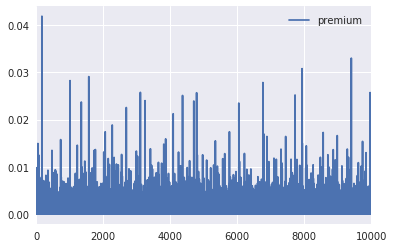

In [21]:
import pandas as pd
%matplotlib inline
y1_df = pd.DataFrame(y1, columns=['premium'])
y1_df.plot()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


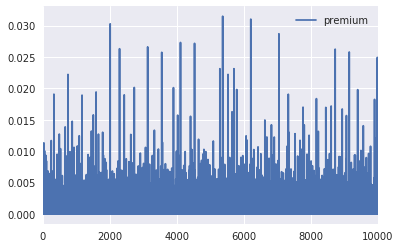

In [22]:
import pandas as pd
%matplotlib inline
y3_df = pd.DataFrame(y3, columns=['premium'])
y3_df.plot()

In [26]:
x1_df = pd.DataFrame(x1, columns=['S', 'r', 'q', 'sigma', 'T', 'EU_Price'])
x1_df.head()

,S,r,q,sigma,T,EU_Price
0,1.00,0.023333,0.0120,0.371429,1.674242,0.193728
1,0.90,0.016667,0.0060,0.307143,2.204545,0.233409
2,1.10,0.014444,0.0240,0.178571,2.469697,0.062116
3,0.85,0.027778,0.0180,0.435714,1.409091,0.271921
4,1.05,0.021111,0.0024,0.242857,0.613636,0.059603


In [27]:
x3_df = pd.DataFrame(x3, columns=['S', 'r', 'q', 'sigma', 'T'])
x3_df.head()

,S,r,q,sigma,T
0,1.00,0.016667,0.0240,0.435714,2.204545
1,0.90,0.023333,0.0180,0.307143,1.939394
2,1.10,0.012222,0.0120,0.371429,2.734848
3,0.85,0.018889,0.0060,0.178571,1.409091
4,1.05,0.025556,0.0048,0.242857,1.143939


In [29]:
import matplotlib.pyplot as plt

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


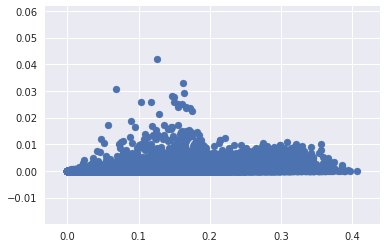

In [31]:
plt.scatter(x1_df['EU_Price'], y1)